# Data Mining: Cluster Analysis

This lecture, we return to the study of Data Mining.

Data Mining is the exploration, investigation, and analysis of data to find patterns and discover otherwise unknown relationships within the data. It usually invovles a combination of human intervention/intelligence and the use of any number of algorithms (many of them over and over again for a variety of different types of data).

Many of these common alogorithms are also used for machine learning. But technically, data mining and machine learning are ***not*** the same thing. The difference is that data mining analyzes the data without making future predictions. Machine learning analyzes the data and then makes a prediction about what will happen in the future.

For this chapter, we will be exploring Cluster Analysis and implementing the K-Means algorithms. Cluster Analysis is a type of problem that applies to both data mining and machine learning. K-Means is an algorithm that is used for data mining and machine learning. But we will be restricting our work to Data Mining.

Let's start by reviewing the work from last class:

In [ ]:
from math import sqrt

def EuclidDist(point1, point2):

    distance = 0
    sum_of_dimensions = 0
    for idx in range(len(point1)):
        sum_of_dimensions += (point1[idx]-point2[idx])**2
    distance = sqrt(sum_of_dimensions)
    
    return distance


def FindClosestCentroid(point, centroid_list):
    
    # Create a list of distances to each of the different centroids
    distance_to_centroid = []
    for cluster_index in range(len(centroid_list)):
        distance = EuclidDist(point, centroid_list[cluster_index])
        distance_to_centroid.append(distance)
        
    # Which centroid is closest? Get its index
    min_distance = min(distance_to_centroid)
    closest_indx = distance_to_centroid.index(min_distance)
    min_centroid = centroid_list[closest_indx]
    #print("Point {} is closest to centroid #{} which is at location {}".format(point, closest_indx+1, min_centroid))
    
    return closest_indx


def InitEmptyClusters(k):
    clusters = []
    for i in range(k):
        clusters.append([])
    return clusters


def AssignItemsToClosestCluster(data_list, centroid_list):
    
    # k should be the same as len(centroids)
    cluster_list = InitEmptyClusters(len(centroid_list))
        
    # Step through each of the items and calculate its closest centroid
    for key, data_point in data_list.items():

        # Add this item's key to the cluster whose centroid is closest...
        # ...this works because the 'centroid_list', 'distance_to_centroid', and 'cluster_list' are parallel
        closest_indx = FindClosestCentroid(data_point, centroid_list)
        cluster_list[closest_indx].append(key)
    
    return cluster_list

In [ ]:
student_grades = {"Alice":(93, 88), "Bob":(55, 55), "Charles":(90, 87), "Dave":(63,57), "Ellen":(89,88), 
                  "Frita":(90,91), "Grant":(70,86), "Heidi":(98,96), "Isabelle":(77,87), "Jack":(80,94), 
                  "Kate":(60,86), "Lisa":(85,86), "Mary":(90,89), "Nancy":(63,58), "Orville":(88,61),
                  "Peter":(95,58), "Quinton":(83,89), "Ralph":(57,65), "Sally":(67,65), "Trent":(62,62),
                  "Ursala":(65,53), "Violet":(82,90), "Wally":(91,93), "Xavier":(81, 84), "Yolanda":(90, 63),
                  "Zack":(85,56)}

point = student_grades["Alice"]

centroid1 = (90, 90)
centroid2 = (90, 60)
centroid3 = (60, 60)
centroids = [centroid1, centroid2, centroid3]

clusters = AssignItemsToClosestCluster(student_grades, centroids)

# You should be able to spot which centroid this point is closest to
print("CENTROIDS: {}".format(centroids))
print("CLUSTER 0: {}".format(clusters[0]))
print("CLUSTER 1: {}".format(clusters[1]))
print("CLUSTER 2: {}".format(clusters[2]))

## Choosing Initial Clusters

In the last lecture, we learned how to assign each datapoint to its closest cluster by calculating the Euclidean Distance to each of the "k" centroids and choosing the shortest one. But how do we get the initial centroids? Up until this point, we used human intelligence and a little bit of guess work to choose the initial centroids. This is an important question and will affect the overall accuracy of our algorithm. There are any number of approaches that we can take: some techniques that are more complex and some techniques that are better than others.

For class, we're going to use a fairly simple technique of choosing "k" unqiue random items from our dataset and using the coordinates of these items as our initial centroids. We won't be too choose in the random selection, but we need to avoid choosing the same item multiple times.

In [ ]:
import random
import math


def ChooseRandomCentroids(data, k):
    
    centroids = [] # our k centroids will go in here
    used_keys = []
    
    # Keep looping until we have k number of centroids
    while len(centroids) < k:
        
        # Choose a random key from the data AND MAKE SURE IT'S A UNIQUE CHOICE
        key = random.choice(list(data.keys()))
        if key not in used_keys:
            print(" Randomly chose {} {} as initial centroid".format(key, data[key]))
            centroids.append(data[key])
            used_keys.append(key)
        
    return centroids


# TESTING: Should return a list containing 3 different datapoints
initial_centroids = ChooseRandomCentroids(student_grades, 3)

In [ ]:
# Now that we have used the computer to choose our initial centroids, let's remake the clusters
clusters = AssignItemsToClosestCluster(student_grades, initial_centroids)
clusters

## Recalculating Each Centroid

We've finished two of the three main KMeans algorithms:
1. Generate the Initial Centroids (using a random choice)
2. Create the Clusters by assigning each datapoint to the nearest centroid

The third main algorithm is to update the position of every centroid by calculating the center of each cluster. We calculate the center of each cluster using the mean of all the datapoints within the cluster. For our two-dimensional data, that means we calculate the average x-coordinate and the average y-coordinate. This means summing all of the x-coordinates in the cluster and then dividing by the number of datapoints in the cluster. We repeat for the y-coordinates.

Let's start by calculate the new centroid location of a single cluster:

In [ ]:
def CaclulateCentroidLocation(data, cluster, dimension_count):
    
    # Initialize this centroid to be all zeros    
    # We typically use a tuple to store the coordinates of each centroid
    # But we use a list in this case because list are mutable
    # We'll convert it from the list back to a tuple later on
    # Most of our data will be two-dimensional (x- and y-coordinates)
    centroid = [0] * dimension_count
    centroid = [0,0]
    print(cluster)
    
    # Avoiding empty clusters that would cause a divide-by-zero error
    if len(cluster) > 0:

        # Go through the x-dimension and then y-dimension
        # The code can handle more dimensions, if necesary
        for idx in range(dimension_count):
            
            # Sum all of x-coordinates in this cluster (or y-coordinates)
            # Then divide by the number of datapoints in the cluster to get the average
            centroid[idx] = sum(data[cluster[i]][idx] for i in range(len(cluster)))  # SUM OF ALL POINTS[idx]
            centroid[idx] /= len(cluster)  # Divide centroid[idx] by the # of points
            
    return tuple(centroid)

## Recalculating All Centroids

Now that we can calculate the center position of a single cluster, let's expand the algorithm to calculate the position of every cluster.

In [ ]:
def UpdateCentroidsKMeans(data, cluster_list):

    # Determine how many dimensions our data has (it will be 2-D for simple problems)
    artibrary_cluster = cluster_list[0]
    arbitrary_key = artibrary_cluster[0]
    dimension_count = len(data[arbitrary_key])

    centroid_list = []

    # CALCULATES A NEW CENTROID FOR EVERY ONE OF THE CLUSTERS
    for cluster in cluster_list:
        centroid_list.append(CaclulateCentroidLocation(data,cluster,dimension_count))

    return centroid_list

centroids = UpdateCentroidsKMeans(student_grades, clusters)
centroids

## Plotting the Graph

Let's write a function to visualize the results. This will help us to see how clusters are assigned and how the centroids move. We'll use two scatter plots: one for the datapoints and one for the centroids. We'll make both the same color, but the centroids will be slightly larger circles with a little bit of transparency.

Our function should be generic so that it can be reused for other data. To support this, we'll pass in labels for the x-axis and y-axis in addition to the overall size of the plot.

In [ ]:
import matplotlib.pyplot as plt

def PlotClusters2D(data, cluster_list, centroid_list, color_list, x_label=None, y_label=None, inches=5):

    plt.figure(figsize=(inches, inches))

    data_x = [data[key][0] for cluster in cluster_list for key in cluster] # index 0 of student's grade
    data_y = [data[key][1] for cluster in cluster_list for key in cluster] # index 1 of student's grade
    data_c = [color_list[i] for i, cluster in enumerate(cluster_list) for key in cluster] # cluster_list, centroid_list, and color_list are parallel
    #data_c = []
    #for i in range(len(cluster_list)):
    #    for key in cluster_list[i]:
    #        data_c.append(color_list[i])
            
    plt.scatter(data_x, data_y, c=data_c) 

    centroids_x = [centroid[0] for centroid in centroid_list]
    centroids_y = [centroid[1] for centroid in centroid_list]
    centroids_c = color_list
    plt.scatter(centroids_x, centroids_y, c=color_list, s=[1000, 1000, 1000], alpha=0.3)    

    plt.xlabel(x_label, fontsize=16, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)

    plt.show()
    return


colors = ["royalblue", "forestgreen", "maroon"]
PlotClusters2D(student_grades, clusters, centroids, colors, "Homework Scores", "Final Exam Scores")

## Iterating Through "K" Means

Do you remember how the K-Means algorithm works? We need repeatedly recalculate the location of each centroid (e.g., the statistical "mean") and reassign each datapoint to its proper cluster.

Let's do it manually at first, plotting our progress. This algorithm starts using a random seed--the random choice of the first K centroids--so each time we run it, so we can run the code multiple times and get a different outcome from each one (some will appear to be more correct than others).

In [ ]:
k = 3
colors = ["royalblue", "forestgreen", "maroon"]

# The first time through we choose RANDOM centroids
centroids = ChooseRandomCentroids(student_grades, k)
clusters  = AssignItemsToClosestCluster(student_grades, centroids)
centroids = UpdateCentroidsKMeans(student_grades, clusters)
PlotClusters2D(student_grades, clusters, centroids, colors, "Homework Scores", "Final Exam Scores")

# TODO: Each subsequent time through we CALCULATE centroids from the MEAN and plot the result


## Write a function to do it until stable

Now that we've worked through the K-Means algorithm manually, let's write a function that will do it for us. In generally, we want to keep repeating the re-centering and cluster assignment steps until the clusters become stable. The clusters are stable when all of the datapoints remain in the same cluster for two rounds in a row. Unfortuantely, there are situations where the clusters never become stable. We'll need to have a cutoff at some point to stop the algorithm from running indefinetely.

In [ ]:
def CreateKMeansClusters(k, data, colors, x_label=None, y_label=None, max_passes=10, show_debug=True):

    # These two variables help us know when to finish the algorithm
    stable_clusters = False
    pass_count = 0
    
    # Choose our initial centroids
    prev_centroids = ChooseRandomCentroids(student_grades, k)
    
    # Loop until the clusters are stable or we exceed the number of rounds
    while stable_clusters == False and pass_count < max_passes:
    
        # Run a single round of the algorithm
        clusters = AssignItemsToClosestCluster(student_grades, prev_centroids)
        centroids = UpdateCentroidsKMeans(student_grades, clusters)

        # Plot the results
        if show_debug:
            PlotClusters2D(data, clusters, centroids, colors, x_label, y_label)

        # Check for stability and update variables
        if prev_centroids == centroids:
            stable_clusters = True
        prev_centroids = centroids
        pass_count += 1
        
        
        
    return (centroids, clusters)


colors = ["royalblue", "forestgreen", "maroon"]
CreateKMeansClusters(3, student_grades, colors, "Homework Scores", "Final Exam Scores")

 Randomly chose Charles (90, 87) as initial centroid
 Randomly chose Frita (90, 91) as initial centroid
 Randomly chose Lisa (85, 86) as initial centroid
['Alice', 'Charles', 'Ellen', 'Mary', 'Peter']
['Frita', 'Heidi', 'Wally']
['Bob', 'Dave', 'Grant', 'Isabelle', 'Jack', 'Kate', 'Lisa', 'Nancy', 'Orville', 'Quinton', 'Ralph', 'Sally', 'Trent', 'Ursala', 'Violet', 'Xavier', 'Yolanda', 'Zack']


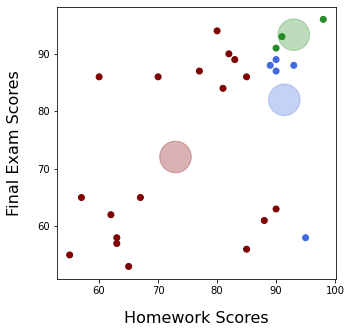

['Charles', 'Ellen', 'Isabelle', 'Lisa', 'Peter', 'Xavier', 'Yolanda']
['Alice', 'Frita', 'Heidi', 'Jack', 'Mary', 'Quinton', 'Violet', 'Wally']
['Bob', 'Dave', 'Grant', 'Kate', 'Nancy', 'Orville', 'Ralph', 'Sally', 'Trent', 'Ursala', 'Zack']


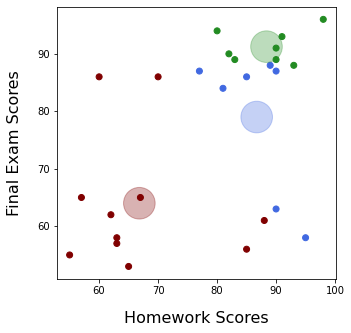

['Grant', 'Orville', 'Peter', 'Xavier', 'Yolanda']
['Alice', 'Charles', 'Ellen', 'Frita', 'Heidi', 'Isabelle', 'Jack', 'Lisa', 'Mary', 'Quinton', 'Violet', 'Wally']
['Bob', 'Dave', 'Kate', 'Nancy', 'Ralph', 'Sally', 'Trent', 'Ursala', 'Zack']


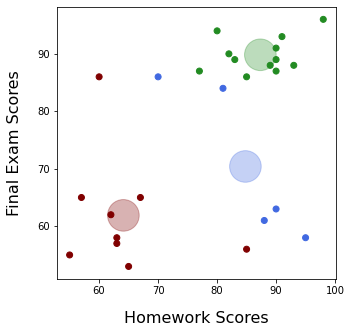

['Orville', 'Peter', 'Yolanda', 'Zack']
['Alice', 'Charles', 'Ellen', 'Frita', 'Grant', 'Heidi', 'Isabelle', 'Jack', 'Lisa', 'Mary', 'Quinton', 'Violet', 'Wally', 'Xavier']
['Bob', 'Dave', 'Kate', 'Nancy', 'Ralph', 'Sally', 'Trent', 'Ursala']


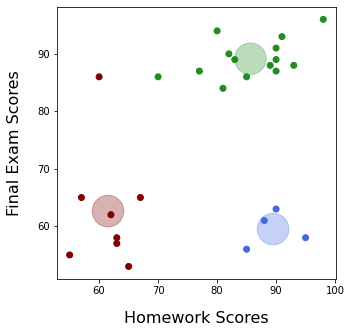

['Orville', 'Peter', 'Yolanda', 'Zack']
['Alice', 'Charles', 'Ellen', 'Frita', 'Grant', 'Heidi', 'Isabelle', 'Jack', 'Lisa', 'Mary', 'Quinton', 'Violet', 'Wally', 'Xavier']
['Bob', 'Dave', 'Kate', 'Nancy', 'Ralph', 'Sally', 'Trent', 'Ursala']


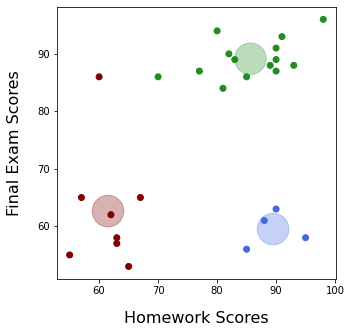

([(89.5, 59.5), (85.64285714285714, 89.14285714285714), (61.5, 62.625)],
 [['Orville', 'Peter', 'Yolanda', 'Zack'],
  ['Alice',
   'Charles',
   'Ellen',
   'Frita',
   'Grant',
   'Heidi',
   'Isabelle',
   'Jack',
   'Lisa',
   'Mary',
   'Quinton',
   'Violet',
   'Wally',
   'Xavier'],
  ['Bob', 'Dave', 'Kate', 'Nancy', 'Ralph', 'Sally', 'Trent', 'Ursala']])

In [3]:
from math import sqrt
import random
import matplotlib.pyplot as plt


def EuclidDist(point1, point2):

    distance = 0
    sum_of_dimensions = 0
    for idx in range(len(point1)):
        sum_of_dimensions += (point1[idx]-point2[idx])**2
    distance = sqrt(sum_of_dimensions)
    
    return distance


def FindClosestCentroid(point, centroid_list):
    
    # Create a list of distances to each of the different centroids
    distance_to_centroid = []
    for cluster_index in range(len(centroid_list)):
        distance = EuclidDist(point, centroid_list[cluster_index])
        distance_to_centroid.append(distance)
        
    # Which centroid is closest? Get its index
    min_distance = min(distance_to_centroid)
    closest_indx = distance_to_centroid.index(min_distance)
    min_centroid = centroid_list[closest_indx]
    #print("Point {} is closest to centroid #{} which is at location {}".format(point, closest_indx+1, min_centroid))
    
    return closest_indx


def InitEmptyClusters(k):
    clusters = []
    for i in range(k):
        clusters.append([])
    return clusters


def AssignItemsToClosestCluster(data_list, centroid_list):
    
    # k should be the same as len(centroids)
    cluster_list = InitEmptyClusters(len(centroid_list))
        
    # Step through each of the items and calculate its closest centroid
    for key, data_point in data_list.items():

        # Add this item's key to the cluster whose centroid is closest...
        # ...this works because the 'centroid_list', 'distance_to_centroid', and 'cluster_list' are parallel
        closest_indx = FindClosestCentroid(data_point, centroid_list)
        cluster_list[closest_indx].append(key)
    
    return cluster_list
    
def ChooseRandomCentroids(data, k):
    
    centroids = [] # our k centroids will go in here
    used_keys = []
    
    # Keep looping until we have k number of centroids
    while len(centroids) < k:
        
        # Choose a random key from the data AND MAKE SURE IT'S A UNIQUE CHOICE
        key = random.choice(list(data.keys()))
        if key not in used_keys:
            print(" Randomly chose {} {} as initial centroid".format(key, data[key]))
            centroids.append(data[key])
            used_keys.append(key)
        
    return centroids
    
def CaclulateCentroidLocation(data, cluster, dimension_count):
    
    # Initialize this centroid to be all zeros    
    # We typically use a tuple to store the coordinates of each centroid
    # But we use a list in this case because list are mutable
    # We'll convert it from the list back to a tuple later on
    # Most of our data will be two-dimensional (x- and y-coordinates)
    centroid = [0] * dimension_count
    centroid = [0,0]
    print(cluster)
    
    # Avoiding empty clusters that would cause a divide-by-zero error
    if len(cluster) > 0:

        # Go through the x-dimension and then y-dimension
        # The code can handle more dimensions, if necesary
        for idx in range(dimension_count):
            
            # Sum all of x-coordinates in this cluster (or y-coordinates)
            # Then divide by the number of datapoints in the cluster to get the average
            centroid[idx] = sum(data[cluster[i]][idx] for i in range(len(cluster)))  # SUM OF ALL POINTS[idx]
            centroid[idx] /= len(cluster)  # Divide centroid[idx] by the # of points
            
    return tuple(centroid)
    
def UpdateCentroidsKMeans(data, cluster_list):

    # Determine how many dimensions our data has (it will be 2-D for simple problems)
    artibrary_cluster = cluster_list[0]
    arbitrary_key = artibrary_cluster[0]
    dimension_count = len(data[arbitrary_key])

    centroid_list = []

    # CALCULATES A NEW CENTROID FOR EVERY ONE OF THE CLUSTERS
    for cluster in cluster_list:
        centroid_list.append(CaclulateCentroidLocation(data,cluster,dimension_count))

    return centroid_list
    
def PlotClusters2D(data, cluster_list, centroid_list, color_list, x_label=None, y_label=None, inches=5):

    plt.figure(figsize=(inches, inches))

    data_x = [data[key][0] for cluster in cluster_list for key in cluster] # index 0 of student's grade
    data_y = [data[key][1] for cluster in cluster_list for key in cluster] # index 1 of student's grade
    data_c = [color_list[i] for i, cluster in enumerate(cluster_list) for key in cluster] # cluster_list, centroid_list, and color_list are parallel
    #data_c = []
    #for i in range(len(cluster_list)):
    #    for key in cluster_list[i]:
    #        data_c.append(color_list[i])
            
    plt.scatter(data_x, data_y, c=data_c) 

    centroids_x = [centroid[0] for centroid in centroid_list]
    centroids_y = [centroid[1] for centroid in centroid_list]
    centroids_c = color_list
    plt.scatter(centroids_x, centroids_y, c=color_list, s=[1000, 1000, 1000], alpha=0.3)    

    plt.xlabel(x_label, fontsize=16, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)

    plt.show()
    return
    
def CreateKMeansClusters(k, data, colors, x_label=None, y_label=None, max_passes=10, show_debug=True):

    # These two variables help us know when to finish the algorithm
    stable_clusters = False
    pass_count = 0
    
    # Choose our initial centroids
    prev_centroids = ChooseRandomCentroids(student_grades, k)
    
    # Loop until the clusters are stable or we exceed the number of rounds
    while stable_clusters == False and pass_count < max_passes:
    
        # Run a single round of the algorithm
        clusters = AssignItemsToClosestCluster(student_grades, prev_centroids)
        centroids = UpdateCentroidsKMeans(student_grades, clusters)

        # Plot the results
        if show_debug:
            PlotClusters2D(data, clusters, centroids, colors, x_label, y_label)

        # Check for stability and update variables
        if prev_centroids == centroids:
            stable_clusters = True
        prev_centroids = centroids
        pass_count += 1
        
        
        
    return (centroids, clusters)

student_grades = {"Alice":(93, 88), "Bob":(55, 55), "Charles":(90, 87), "Dave":(63,57), "Ellen":(89,88), 
                  "Frita":(90,91), "Grant":(70,86), "Heidi":(98,96), "Isabelle":(77,87), "Jack":(80,94), 
                  "Kate":(60,86), "Lisa":(85,86), "Mary":(90,89), "Nancy":(63,58), "Orville":(88,61),
                  "Peter":(95,58), "Quinton":(83,89), "Ralph":(57,65), "Sally":(67,65), "Trent":(62,62),
                  "Ursala":(65,53), "Violet":(82,90), "Wally":(91,93), "Xavier":(81, 84), "Yolanda":(90, 63),
                  "Zack":(85,56)}

colors = ["royalblue", "forestgreen", "maroon"]
CreateKMeansClusters(3, student_grades, colors, "Homework Scores", "Final Exam Scores")